LAB 4: BÀI THỰC HÀNH CHUẨN BỊ DỮ LIỆU

PHẦN 1: DATA CLEANSING & FEATURE ENGINEERING

1. Viết hàm load_data() để tải dữ liệu lên ứng dụng. Sau đó, hiển thị ra màn hình 10 dòng đầu tiên.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data


file_path = "D:\DataAnalyst\Lab_4\\titanic_disaster.csv"
data = load_data(file_path)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


- Gọi hàm "load_data()" và gắn tham số "file_path" để đọc file dữ liệu

2. Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat 
map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked.

In [3]:
missing_data = data.isnull().sum()
missing_data_percent = (data.isnull().sum() / data.shape[0]) * 100
missing_data_df = pd.DataFrame({'Số lượng thiếu': missing_data, 'Tỷ lệ thiếu (%)': missing_data_percent})
print(missing_data_df)

             Số lượng thiếu  Tỷ lệ thiếu (%)
PassengerId               0         0.000000
Survived                  0         0.000000
Pclass                    0         0.000000
Name                      0         0.000000
Sex                       0         0.000000
Age                     177        19.865320
SibSp                     0         0.000000
Parch                     0         0.000000
Ticket                    0         0.000000
Fare                      0         0.000000
Cabin                   687        77.104377
Embarked                  2         0.224467


- isnull(): Phương thức này trả về một DataFrame boolean, trong đó True chỉ ra các giá trị bị thiếu (NaN) và False chỉ ra các giá trị hiện có.

- num(): Tính tổng True các giá trị bị thiếu cho mỗi cột, tạo ra một Series hiển thị tổng số giá trị bị thiếu trên mỗi cột.

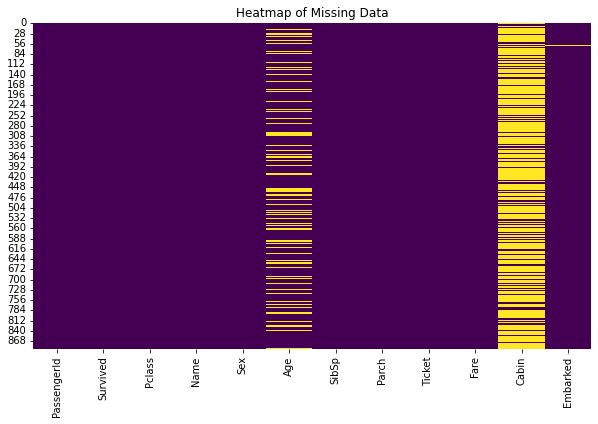

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.show()

- Nhận xét:

+, Age: Có 177 giá trị bị thiếu, chiếm khoảng 19.87% tổng số dữ liệu. Đây là một tỷ lệ thiếu khá cao và có thể ảnh hưởng đến các phân tích liên quan đến độ tuổi.

+, Cabin: Đây là biến số có tỷ lệ thiếu cao nhất với 687 giá trị bị thiếu, chiếm 77.10% tổng số dữ liệu. Với mức độ thiếu này, việc sử dụng biến Cabin trong phân tích sẽ rất khó khăn và cần xem xét loại bỏ hoặc xử lý thay thế giá trị thiếu một cách cẩn thận.

+, Embarked: Chỉ có 2 giá trị bị thiếu, chiếm 0.22% tổng số dữ liệu. Đây là một tỷ lệ thiếu rất thấp và có thể dễ dàng xử lý bằng cách thay thế giá trị thiếu bằng giá trị phổ biến nhất hoặc loại bỏ các dòng dữ liệu thiếu.

3. Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi tách cột xong thì xóa luôn cột Name.

In [5]:
data[['firstName', 'secondName']] = data['Name'].str.split(',', expand=True)
data.drop(columns=['Name'], inplace=True)
data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr. James
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem)


- data[['firstName', 'secondName']] = data['Name'].str.split(',', expand=True): Tách cột "Name" thành 2 cột "firstName" và "secondName". Chỉ định dấu phân cách là dấu phẩy. Với đối số "expand=True" rất quan trọng vì nó sẽ trả về một Series chứa danh sách cho mỗi hàng.

-  drop(columns=['Name'], inplace=True): Sử dụng drop() để xóa cột "Name" và tạo ra DataFrame mới vì "inplace=True".

4. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male -> M và female -> F.

In [6]:
data['Sex'] = data['Sex'].replace({'male': 'M', 'female': 'F'})
data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry
5,6,0,3,M,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr. James
6,7,0,1,M,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J
7,8,0,3,M,2.0,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard
8,9,1,3,F,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9,10,1,2,F,14.0,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem)


- Chọn cột "Sex" rồi sau đó rút gọn dữ liệu bằng cách sử dụng hàm replace().

5. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass).

a. Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu.

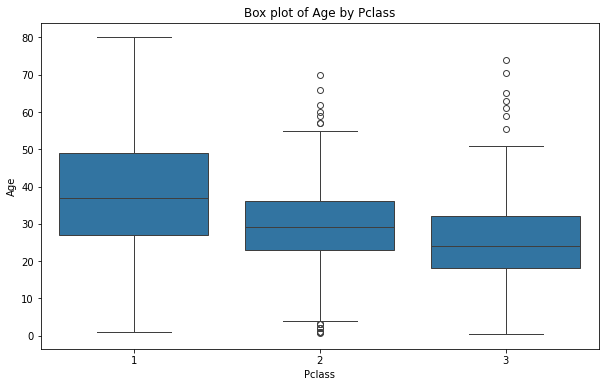

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=data)
plt.title('Box plot of Age by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

- Nhận xét: Tuổi trung bình của hành khách hạng 1 thường cao hơn so với các hạng khác.

b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực quan dữ liệu đã xử lý thiếu cho cột 'Age' bằng biểu đồ Heat map.

In [8]:
average_age_by_class = data.groupby('Pclass')['Age'].mean()
print("Giá trị trung bình tuổi theo từng hạng hành khách:")
print(average_age_by_class)

Giá trị trung bình tuổi theo từng hạng hành khách:
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


-  data.groupby('Pclass'): Nhóm dữ liệu trong DataFrame theo các giá trị trong cột 'Pclass'. Điều này tạo ra một đối tượng GroupBy.

- ['Age']: Chọn cột 'Tuổi' từ dữ liệu được nhóm.

- .mean(): Tính giá trị trung bình.

In [9]:
data['Age'] = data.apply(lambda row: average_age_by_class[row['Pclass']] if pd.isnull(row['Age']) else row['Age'], axis=1)
print("\nDữ liệu sau khi thay thế:")
print(data)


Dữ liệu sau khi thay thế:
     PassengerId  Survived  Pclass Sex       Age  SibSp  Parch  \
0              1         0       3   M  22.00000      1      0   
1              2         1       1   F  38.00000      1      0   
2              3         1       3   F  26.00000      0      0   
3              4         1       1   F  35.00000      1      0   
4              5         0       3   M  35.00000      0      0   
..           ...       ...     ...  ..       ...    ...    ...   
886          887         0       2   M  27.00000      0      0   
887          888         1       1   F  19.00000      0      0   
888          889         0       3   F  25.14062      1      2   
889          890         1       1   M  26.00000      0      0   
890          891         0       3   M  32.00000      0      0   

               Ticket     Fare Cabin Embarked  firstName  \
0           A/5 21171   7.2500   NaN        S     Braund   
1            PC 17599  71.2833   C85        C    Cumings   


- apply(): Hàm apply là một công cụ mạnh mẽ trong Pandas cho phép bạn áp dụng hàm tùy chỉnh (gọi là hàm lambda ở đây) cho từng hàng của DataFrame. Hàm bạn định nghĩa sẽ được thực thi cho từng hàng trong DataFrame.

- lambda row:: Định nghĩa một hàm ẩn danh có một đối số duy nhất, biểu diễn một hàng duy nhất của DataFrame. row

- average_age_by_class[row['Pclass']]: Kiểm ta xem giá trị 'Age' trong hàng hiện tại ( row['Age']) có bị thiếu hay không (sử dụng pd.isnull).
Nếu thiếu thì pd.isnull(row['Age'])là True và ngược lại.

- axis=1: Đối số này chỉ định rằng hàm lambda sẽ được áp dụng cho mỗi hàng của DataFrame.

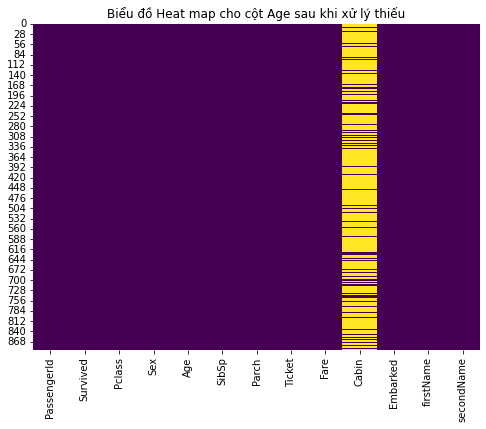

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title('Biểu đồ Heat map cho cột Age sau khi xử lý thiếu')
plt.show()

6. Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa trên độ tuổi của hành khách như sau: (age =< 12]: Kid, (12, 18]: Teen, (18, 60]: Adult và ( age > 60): Older

In [11]:
bins = [0, 12, 18, 60, data['Age'].max()]
labels = ['Kid', 'Teen', 'Adult', 'Older']

data['Agegroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup
0,1,0,3,M,22.00000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult
1,2,1,1,F,38.00000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult
2,3,1,3,F,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult
3,4,1,1,F,35.00000,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult
4,5,0,3,M,35.00000,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult
5,6,0,3,M,25.14062,0,0,330877,8.4583,NaN,Q,Moran,Mr. James,Adult
6,7,0,1,M,54.00000,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J,Adult
7,8,0,3,M,2.00000,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard,Kid
8,9,1,3,F,27.00000,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),Adult
9,10,1,2,F,14.00000,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem),Teen


- pd.cut(data['Age'], bins=bins, labels=labels, right=False): Sử dụng hàm pd.cut để phân chia giá trị tuổi (Age) vào các nhóm (bins) và gán nhãn (labels) tương ứng.

- right=False: Quy định khoảng giá trị là đóng bên trái và mở bên phải, tức là giới hạn trên của mỗi khoảng không bao gồm giá trị đó (ví dụ, 12 tuổi sẽ thuộc nhóm Teen, không phải Kid).

7. Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr, Mrs, Miss, Master ra khỏi "secondName".

In [12]:
def extract_prefix(name):
    prefixes = ['Mr.', 'Mrs.', 'Miss.', 'Master.']
    for prefix in prefixes:
        if prefix in name:
            return prefix.strip('.')
    return 'Unknown'


data['namePrefix'] = data['secondName'].apply(extract_prefix)
data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,namePrefix
0,1,0,3,M,22.00000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,Mr
1,2,1,1,F,38.00000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,Mrs
2,3,1,3,F,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,Miss
3,4,1,1,F,35.00000,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Mrs
4,5,0,3,M,35.00000,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,Mr
5,6,0,3,M,25.14062,0,0,330877,8.4583,NaN,Q,Moran,Mr. James,Adult,Mr
6,7,0,1,M,54.00000,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J,Adult,Mr
7,8,0,3,M,2.00000,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard,Kid,Master
8,9,1,3,F,27.00000,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),Adult,Mrs
9,10,1,2,F,14.00000,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem),Teen,Mrs


- Tạo hàm "extract_prefix" và gán gía trị đầu vào là chuỗi "name" cho nó.
- Tạo danh sách "prefixes" với các tiền tố phổ biến.

- Sử dụng vòng lặp "for" để duyệt qua các tiền tố trong danh sách vừa tạo, viết điều kiện if-else để kiểm tra xem tiền tố hiện tại có xuất hiện trong tên hay không. Nếu có thì hàm sẽ trả về tiền tố đó sau khi loại bỏ dấu chấm ở cuối bằng phương thức strip('.'). Ngược lại nếu không thấy thì trả về "Unknown".

- Sử dụng phương thức "apply()" để áp dụng hàm "extract_prefix" cho từng giá trị trong cột "secondName" của DataFrame data.

8. Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch.

In [13]:
def family_size(row):
    return 1 + row['SibSp'] + row['Parch']

data['familySize'] = data.apply(family_size, axis=1)

data.head(10)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,namePrefix,familySize
0,1,0,3,M,22.00000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,Mr,2
1,2,1,1,F,38.00000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,Mrs,2
2,3,1,3,F,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,Miss,1
3,4,1,1,F,35.00000,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Mrs,2
4,5,0,3,M,35.00000,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,Mr,1
5,6,0,3,M,25.14062,0,0,330877,8.4583,NaN,Q,Moran,Mr. James,Adult,Mr,1
6,7,0,1,M,54.00000,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J,Adult,Mr,1
7,8,0,3,M,2.00000,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard,Kid,Master,5
8,9,1,3,F,27.00000,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),Adult,Mrs,3
9,10,1,2,F,14.00000,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem),Teen,Mrs,2


- Tạo hàm "family_size" và gán giá trị đầu vào là "row", kết quả trả về là tổng số người trong gia đình của hành khách, bao gồm chính hành khách đó (do đó, cộng thêm 1).

- data.apply(family_size, axis=1): Áp dụng hàm family_size cho mỗi hàng của DataFrame data.

- axis=1: Chỉ định rằng hàm được áp dụng theo hàng (nếu axis=0 thì hàm sẽ được áp dụng theo cột).

9. Tạo thêm đặc trưng "Alone" để xác định hành khách đi theo nhóm hay cá nhân bằng cách dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.

In [14]:
def Alone(family_size):
    if family_size == 0:
        return 1
    else: 
        return 0

data['Alone'] = data['familySize'].apply(Alone)
data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,namePrefix,familySize,Alone
0,1,0,3,M,22.00000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,Mr,2,0
1,2,1,1,F,38.00000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,Mrs,2,0
2,3,1,3,F,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,Miss,1,0
3,4,1,1,F,35.00000,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Mrs,2,0
4,5,0,3,M,35.00000,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,Mr,1,0
5,6,0,3,M,25.14062,0,0,330877,8.4583,NaN,Q,Moran,Mr. James,Adult,Mr,1,0
6,7,0,1,M,54.00000,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J,Adult,Mr,1,0
7,8,0,3,M,2.00000,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard,Kid,Master,5,0
8,9,1,3,F,27.00000,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),Adult,Mrs,3,0
9,10,1,2,F,14.00000,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem),Teen,Mrs,2,0


- Tạo hàm "Alone" nhận giá trị đầu vào là "family_size", viết điều kiện nếu "familySize" = 0 thì giá trị trả về Alone = 1 và ngược lại là 0.
 
- Thêm một cột mới tên là "Alone" vào DataFrame data. Cột này chứa các giá trị được tính bằng cách áp dụng hàm Alone lên từng giá trị của cột familySize.

10. Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu thì thay thế bằng "Unknown".

In [15]:
data['typeCabin'] = data['Cabin'].str[0]
data['typeCabin'].fillna('Unknown', inplace=True)
data[['Cabin', 'typeCabin']].head(10)

,Cabin,typeCabin
0,NaN,Unknown
1,C85,C
2,NaN,Unknown
3,C123,C
4,NaN,Unknown
5,NaN,Unknown
6,E46,E
7,NaN,Unknown
8,NaN,Unknown
9,NaN,Unknown


- data['typeCabin'] = data['Cabin'].str[0]: Tạo ra một cột mới typeCabin trong DataFrame data, data['Cabin'].str[0] sẽ lấy ký tự đầu tiên của mỗi giá trị trong cột Cabin.

- data['typeCabin'].fillna('Unknown', inplace=True): Lệnh này thay thế tất cả các giá trị NaN trong cột typeCabin bằng chuỗi 'Unknown'. Tham số inplace=True có nghĩa là sự thay đổi sẽ được áp dụng trực tiếp vào DataFrame data mà không cần gán lại.

PHẦN 2: KHAI THÁC THÔNG TIN HỮU ÍCH – EDA

12. Trực quan thông tin tương quan tỉ lệ sống sót và thiệt mạng trên từng nhóm giới tính.

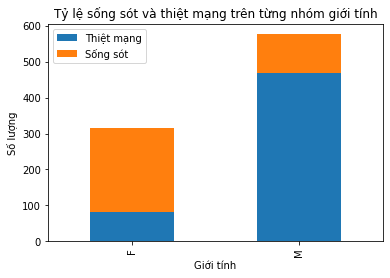

In [16]:
sex_survival = data.groupby(['Sex', 'Survived']).size().unstack()

sex_survival.plot(kind='bar', stacked=True)
plt.title('Tỷ lệ sống sót và thiệt mạng trên từng nhóm giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng')
plt.legend(['Thiệt mạng', 'Sống sót'])
plt.show()


- data.groupby(['Sex', 'Survived']): Tập hợp dữ liệu data được nhóm lại theo hai cột 'Sex' và 'Survived'.

- .size(): Đếm số lượng hàng trong mỗi nhóm được tạo ra từ groupby.

- .unstack(): Chuyển đổi các nhóm 'Survived' từ hàng thành cột để dễ dàng phân tích và trực quan hóa.

- pclass_survival.plot(kind='bar', stacked=True): Vẽ biểu đồ cột với các cột được chồng lên nhau (stacked).

13. Trực quan thông tin hành khách sống sót trên từng nhóm phân loại hành khách (Pclass).

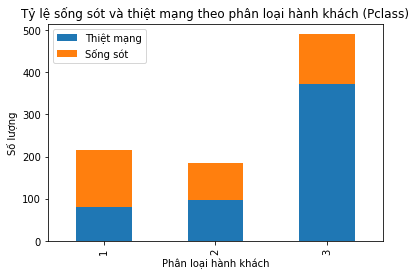

In [17]:
pclass_survival = data.groupby(['Pclass', 'Survived']).size().unstack()

pclass_survival.plot(kind='bar', stacked=True)
plt.title('Tỷ lệ sống sót và thiệt mạng theo phân loại hành khách (Pclass)')
plt.xlabel('Phân loại hành khách')
plt.ylabel('Số lượng')
plt.legend(['Thiệt mạng', 'Sống sót'])
plt.show()

- data.groupby(['Pclass', 'Survived']): Tập hợp dữ liệu data được nhóm lại theo hai cột 'Pclass' và 'Survived'.

- .size(): Đếm số lượng hàng trong mỗi nhóm được tạo ra từ groupby.

- .unstack(): Chuyển đổi các nhóm 'Survived' từ hàng thành cột để dễ dàng phân tích và trực quan hóa.

- pclass_survival.plot(kind='bar', stacked=True): Vẽ biểu đồ cột với các cột được chồng lên nhau (stacked).

14. Trực quan thông tin hành khách sống sót trên từng nhóm giới tính và thang đo tuổi tác.

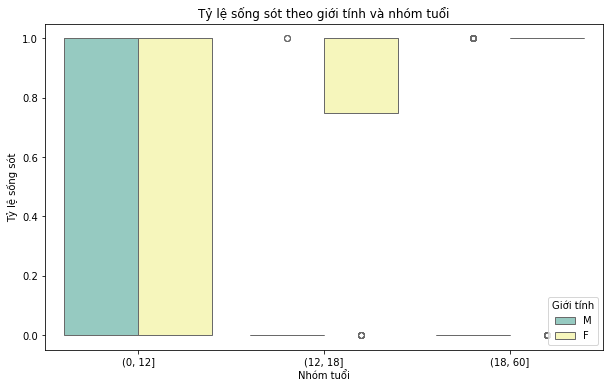

In [18]:
age_bins = [0, 12, 18, 60]
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins)

plt.figure(figsize=(10, 6))
sns.boxplot(x='AgeGroup', y='Survived', hue='Sex', data=data, palette='Set3')
plt.title('Tỷ lệ sống sót theo giới tính và nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Tỷ lệ sống sót')
plt.legend(title='Giới tính')
plt.show()

- age_bins là một danh sách định nghĩa các khoảng tuổi: 0-12, 12-18, và 18-60.

- pd.cut(data['Age'], bins=age_bins) tạo ra một cột mới AgeGroup trong DataFrame data bằng cách phân loại cột Age thành các nhóm tuổi dựa trên các khoảng trong age_bins.

- sns.boxplot(x='AgeGroup', y='Survived', hue='Sex', data=data, palette='Set3') sử dụng thư viện seaborn để vẽ biểu đồ hộp.

15. Trực quan xác suất hành khách sống sót dựa trên thông tin nhóm đi cùng.

C:\Users\admin\AppData\Local\Temp\ipykernel_37176\1629712618.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=family_survival.index, y=family_survival.values, palette='viridis')


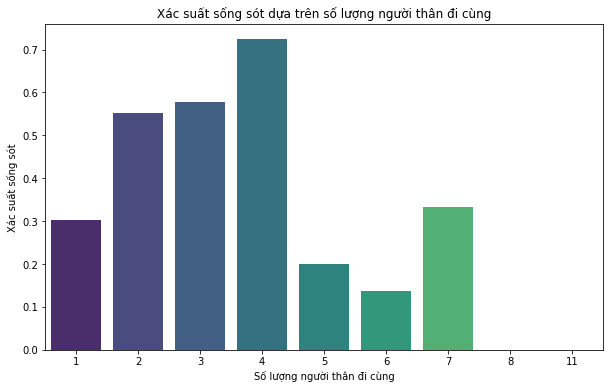

In [19]:
family_survival = data.groupby('familySize')['Survived'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=family_survival.index, y=family_survival.values, palette='viridis')
plt.title('Xác suất sống sót dựa trên số lượng người thân đi cùng')
plt.xlabel('Số lượng người thân đi cùng')
plt.ylabel('Xác suất sống sót')
plt.show()

- data.groupby('familySize')['Survived'].mean(): Nhóm dữ liệu theo cột familySize (số lượng người thân đi cùng) và tính trung bình của cột Survived cho mỗi nhóm.

- family_survival là một series với chỉ mục là số lượng người thân đi cùng và giá trị là xác suất sống sót (trung bình của cột Survived cho mỗi nhóm).

16. Trực quan xác suất hành khách sống sót dựa trên thông tin giá vé.

C:\Users\admin\AppData\Local\Temp\ipykernel_37176\3458271966.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=data, palette='Set2')


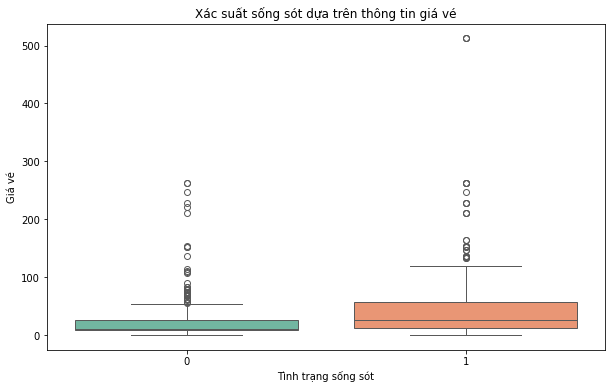

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=data, palette='Set2')
plt.title('Xác suất sống sót dựa trên thông tin giá vé')
plt.xlabel('Tình trạng sống sót')
plt.ylabel('Giá vé')
plt.show()

- Tạo một khung hình (figure) mới với kích thước 10x6 inch.

- Sử dụng Seaborn để vẽ biểu đồ hộp (boxplot).

17. Trực quan số lượng người thiệt mạng và sống sót theo phân lớp (Pclass) hành khách và cảng sẽ cập bến.

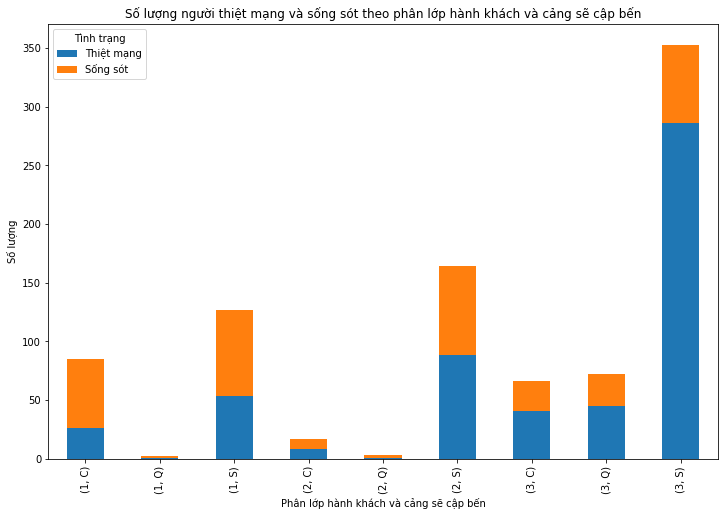

In [21]:
pclass_embarked_survival = data.groupby(['Pclass', 'Embarked', 'Survived']).size().unstack()

pclass_embarked_survival.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Số lượng người thiệt mạng và sống sót theo phân lớp hành khách và cảng sẽ cập bến')
plt.xlabel('Phân lớp hành khách và cảng sẽ cập bến')
plt.ylabel('Số lượng')
plt.legend(['Thiệt mạng', 'Sống sót'], title='Tình trạng')
plt.show()


- data.groupby(['Pclass', 'Embarked', 'Survived']): Tập hợp dữ liệu data được nhóm lại theo ba cột 'Pclass' (phân lớp hành khách), 'Embarked' (cảng sẽ cập bến), và 'Survived' (tình trạng sống sót).

- .size(): Đếm số lượng hàng trong mỗi nhóm được tạo ra từ groupby.

- .unstack(): Chuyển đổi kết quả nhóm thành một DataFrame với các cấp độ nhóm cuối cùng chuyển thành cột.